# kaggle House Prices

回帰問題について一通り解析の流れを体験します、kaggleの練習問題を題材にします
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [196]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

上記URLからHouse priceのデータをダウンロードし、任意の場所においてパスを修正してください

## データの把握

In [139]:
import os
print(os.listdir("./input"))

['data_description.txt', 'test.csv', 'sample_submission.csv', 'train.csv']


In [140]:
#pandasを省略せずに表示する
pd.set_option('display.max_columns', 81) #列数
pd.set_option('display.max_rows', 1000) #行数
#その他設定項目はこれぐらいあるよ
dir(pd.options.display)

['chop_threshold',
 'colheader_justify',
 'column_space',
 'date_dayfirst',
 'date_yearfirst',
 'encoding',
 'expand_frame_repr',
 'float_format',
 'html',
 'large_repr',
 'latex',
 'max_categories',
 'max_columns',
 'max_colwidth',
 'max_info_columns',
 'max_info_rows',
 'max_rows',
 'max_seq_items',
 'memory_usage',
 'multi_sparse',
 'notebook_repr_html',
 'pprint_nest_depth',
 'precision',
 'show_dimensions',
 'unicode',
 'width']

In [218]:
#読み込みと行頭表示
df = pd.read_csv('./input/train.csv')
#Save the 'Id' column
train_ID = df['Id']

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [142]:
#dataの外形把握
df.shape

(1460, 81)

In [143]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


## 前処理

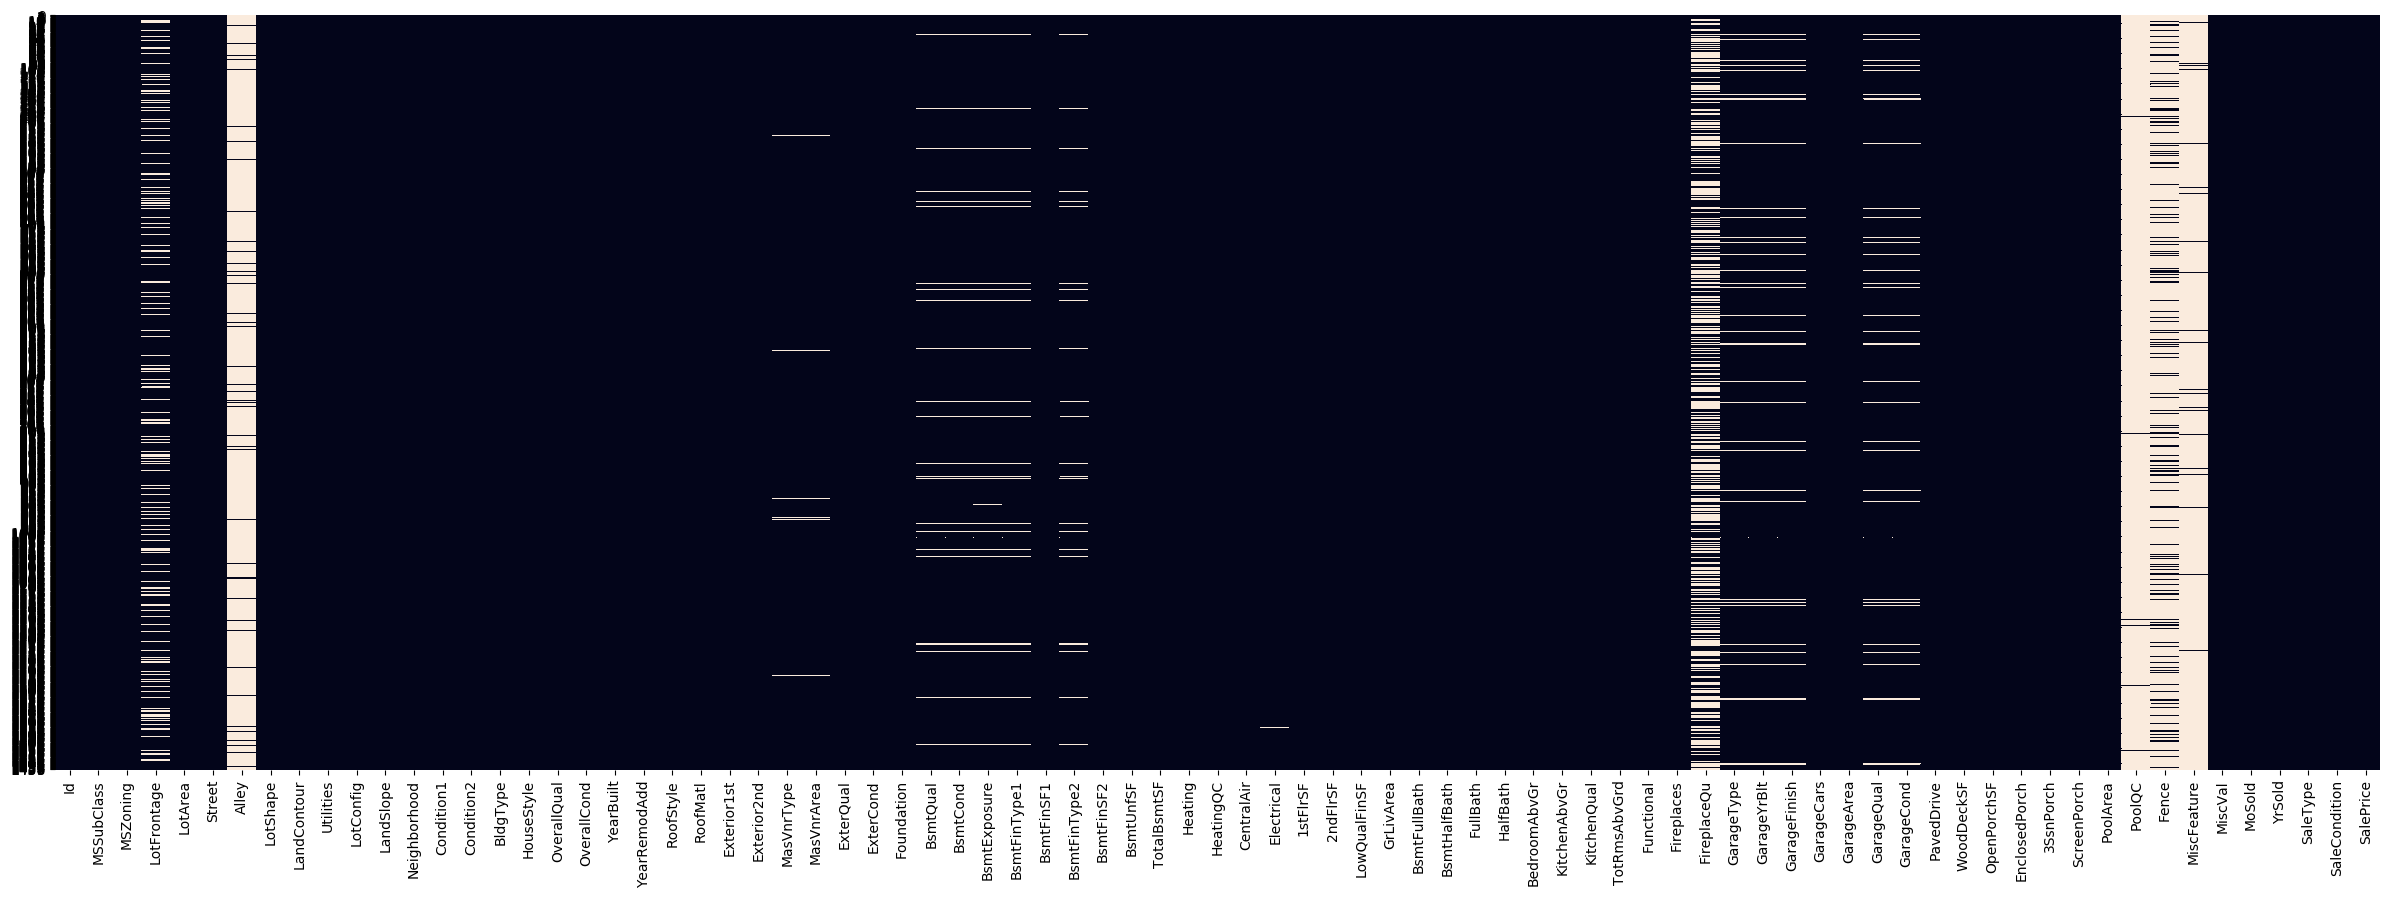

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10),dpi=100)
sns.heatmap(df.isnull(), 
            xticklabels = 1,    #x軸
            yticklabels = 1,#y軸
            cbar=False)


In [145]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

欠損値すごい多いやつありますね。
dataの説明を読んでいきます


- Id                 int64　
- MSSubClass         int64　建物等級
- MSZoning          object　販売時の一般的なゾーニング（居住地域とか農村地とか商業地とか） 
- LotFrontage      float64　間口の広さ
- LotArea            int64　敷地面積
- Street            object　接続している道のタイプ
- Alley             object　接続している小道のタイぷ
- LotShape          object　総合した敷地の形
- LandContour       object  敷地の形状（平面とか坂道とか）
- Utilities         object　その施設が対応しているライフライン（ガスとか水道とか）
- LotConfig         object　その土地の位置（袋小路とか、角とか）
- LandSlope         object　その土地のスロープの勾配
- Neighborhood      object　エイムズ市内のどういったエリアにあるのか（古い街とか北部とか）
- Condition1        object　主要道路や鉄道の先に面しているか
- Condition2        object　主要道路や鉄道の先に面しているか（ふたつ目の要素）
- BldgType          object　対象世帯（シングルファミリー向けとか、二世帯向けとか
- HouseStyle        object　住まいのスタイル（ストーリーの数が示されてるけど謎）
- OverallQual        int64　全体的な素材と仕上げのクオリティ
- OverallCond        int64　家の全体的なコンデション
- YearBuilt          int64　元の建築日
- YearRemodAdd       int64　改築日（改築してない場合は元の建築日）
- RoofStyle         object　ルーフのスタイル
- RoofMatl          object　ルーフの素材
- Exterior1st       object　家の外装（アスベストとか、コンクリとか）
- Exterior2nd       object　家の外装２（複数の場合）
- MasVnrType        object　ベニアのタイプ（黒めとか）
- MasVnrArea       float64　ベニアの面積
- ExterQual         object　外装の品質
- ExterCond         object　塗装の品質
- Foundation        object　基礎材の種類
- BsmtQual          object　地下室の高さ
- BsmtCond          object　地下室の状態
- BsmtExposure      object　ベランダや裏口などの出口（ワークアウトなど）の便利さ
- BsmtFinType1      object　地下室（finished basementは部屋っぽく綺麗にしてある地下室）の広さ（クオリティ）
- BsmtFinSF1         int64　うえの地下室の面積
- BsmtFinType2      object　地下室（finished basementは部屋っぽく綺麗にしてある地下室）ふたつ目の広さ（クオリティ）
- BsmtFinSF2         int64　うえの地下室の面積
- BsmtUnfSF          int64　未完成な部分の地下室の面積
- TotalBsmtSF        int64　地下室の総面積
- Heating           object　ヒーターの種類
- HeatingQC         object　ヒーターのクオリティ
- CentralAir        object　セントラルエアコンかどうか
- Electrical        object　エアコンは電気かどうか
- 1stFlrSF           int64　一階の面積
- 2ndFlrSF           int64　二階の面積
- LowQualFinSF       int64　いけてない部分の面積
- GrLivArea          int64　地下の居住エリア
- BsmtFullBath       int64　ユニットバスかどうか
- BsmtHalfBath       int64　トイレのみ（といれ？）
- FullBath           int64　地下にあるユニットバス
- HalfBath           int64　地下にあるトイレ
- BedroomAbvGr       int64　地上にあるベッドルーム
- KitchenAbvGr       int64　地上にあるキッチン
- KitchenQual       object　キッチンのクオリティ
- TotRmsAbvGrd       int64　地上にある部屋数
- Functional        object　家の機能（または控除額か？）
- Fireplaces         int64　暖炉の数
- FireplaceQu       object　暖炉のクオリティ
- GarageType        object　ガレージの場所
- GarageYrBlt      float64　ガレージの年式
- GarageFinish      object　ガレージの内部仕上げ
- GarageCars         int64　ガレージに何台入るか
- GarageArea         int64　ガレージの面積
- GarageQual        object　ガレージクオリティ
- GarageCond        object　ガレージコンディション
- PavedDrive        object　私道の種類
- WoodDeckSF         int64　ウッドデッキの面積
- OpenPorchSF        int64　オープンポーチの面積
- EnclosedPorch      int64　ポーチの面積
- 3SsnPorch          int64　Three season porchという種類のポーチの面積
- ScreenPorch        int64　Enclosed porchという種類のポーチの面積
- PoolArea           int64　プールの面積
- PoolQC            object　プールのクオリティ
- Fence             object　フェンスのクオリティ
- MiscFeature       object　その他の機能
- MiscVal            int64　その他の機能の価値
- MoSold             int64　販売月
- YrSold             int64　販売年
- SaleType          object　販売タイプ（ローンとか）
- SaleCondition     object　販売条件
- SalePrice          int64　(目的関数)

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿

下記がnan
データについていた説明書を見ると、下のうちいくつかはnanが意味を持っている（例えばプールがないこととか）ようです。

- LotFrontage       259
- Alley            1369
- BsmtQual           37
- BsmtCond           37
- BsmtExposure       38
- BsmtFinType1       37
- BsmtFinType2       38
- Electrical          1
- FireplaceQu       690
- GarageType         81
- GarageYrBlt        81
- GarageFinish       81
- GarageQual         81
- GarageCond         81
- PoolQC           1453
- Fence            1179
- MiscFeature      1406



＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿

そしてこっちが、数字じゃないやつです

- MSZoning          object　販売時の一般的なゾーニング（居住地域とか農村地とか商業地とか） 

- Street            object　接続している道のタイプ
- Alley             object　接続している小道のタイぷ
- LotShape          object　総合した敷地の形
- LandContour       object  敷地の形状（平面とか坂道とか）
- Utilities         object　その施設が対応しているライフライン（ガスとか水道とか）
- LotConfig         object　その土地の位置（袋小路とか、角とか）
- LandSlope         object　その土地のスロープの勾配
- Neighborhood      object　エイムズ市内のどういったエリアにあるのか（古い街とか北部とか）
- Condition1        object　主要道路や鉄道の先に面しているか
- Condition2        object　主要道路や鉄道の先に面しているか（ふたつ目の要素）
- BldgType          object　対象世帯（シングルファミリー向けとか、二世帯向けとか
- HouseStyle        object　住まいのスタイル（ストーリーの数が示されてるけど謎）

- RoofStyle         object　ルーフのスタイル
- RoofMatl          object　ルーフの素材
- Exterior1st       object　家の外装（アスベストとか、コンクリとか）
- Exterior2nd       object　家の外装２（複数の場合）
- MasVnrType        object　ベニアのタイプ（黒めとか）

- ExterQual         object　外装の品質
- ExterCond         object　塗装の品質
- Foundation        object　基礎材の種類
- BsmtQual          object　地下室の高さ
- BsmtCond          object　地下室の状態
- BsmtExposure      object　ベランダや裏口などの出口（ワークアウトなど）の便利さ
- BsmtFinType1      object　地下室（finished basementは部屋っぽく綺麗にしてある地下室）の広さ（クオリティ）

- BsmtFinType2      object　地下室（finished basementは部屋っぽく綺麗にしてある地下室）ふたつ目の広さ（クオリティ）

- Heating           object　ヒーターの種類
- HeatingQC         object　ヒーターのクオリティ
- CentralAir        object　セントラルエアコンかどうか
- Electrical        object　エアコンは電気かどうか

- KitchenQual       object　キッチンのクオリティ

- Functional        object　家の機能（または控除額か？）

- FireplaceQu       object　暖炉のクオリティ
- GarageType        object　ガレージの場所

- GarageFinish      object　ガレージの内部仕上げ

- GarageQual        object　ガレージクオリティ
- GarageCond        object　ガレージコンディション
- PavedDrive        object　私道の種類

- PoolQC            object　プールのクオリティ
- Fence             object　フェンスのクオリティ
- MiscFeature       object　その他の機能

- SaleType          object　販売タイプ（ローンとか）
- SaleCondition     object　販売条件


多い！　順番にやっていきましょう。淡々とやります

### 前処理１　ID消す
インデックスがあるので、IDを消します。

In [146]:
df = df.drop('Id',axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 前処理2　外れ値の削除
外れ値があるらしく、ターゲットと各項目をそれぞれ図にして表示してみます。
まずおかしいな、、、というのを見つけて、どのデータを削除するか考えます。

当然、あまりにも削除し過ぎると学習に悪影響を及ぼす（汎化性の低下）ので、そんなにたくさん削除したらダメです。

In [147]:
check_shape = df.select_dtypes(include=[int, float]) #dfから数字のやつだけ抜き出してくる
print (check_shape.shape)
df.head()

(1460, 37)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


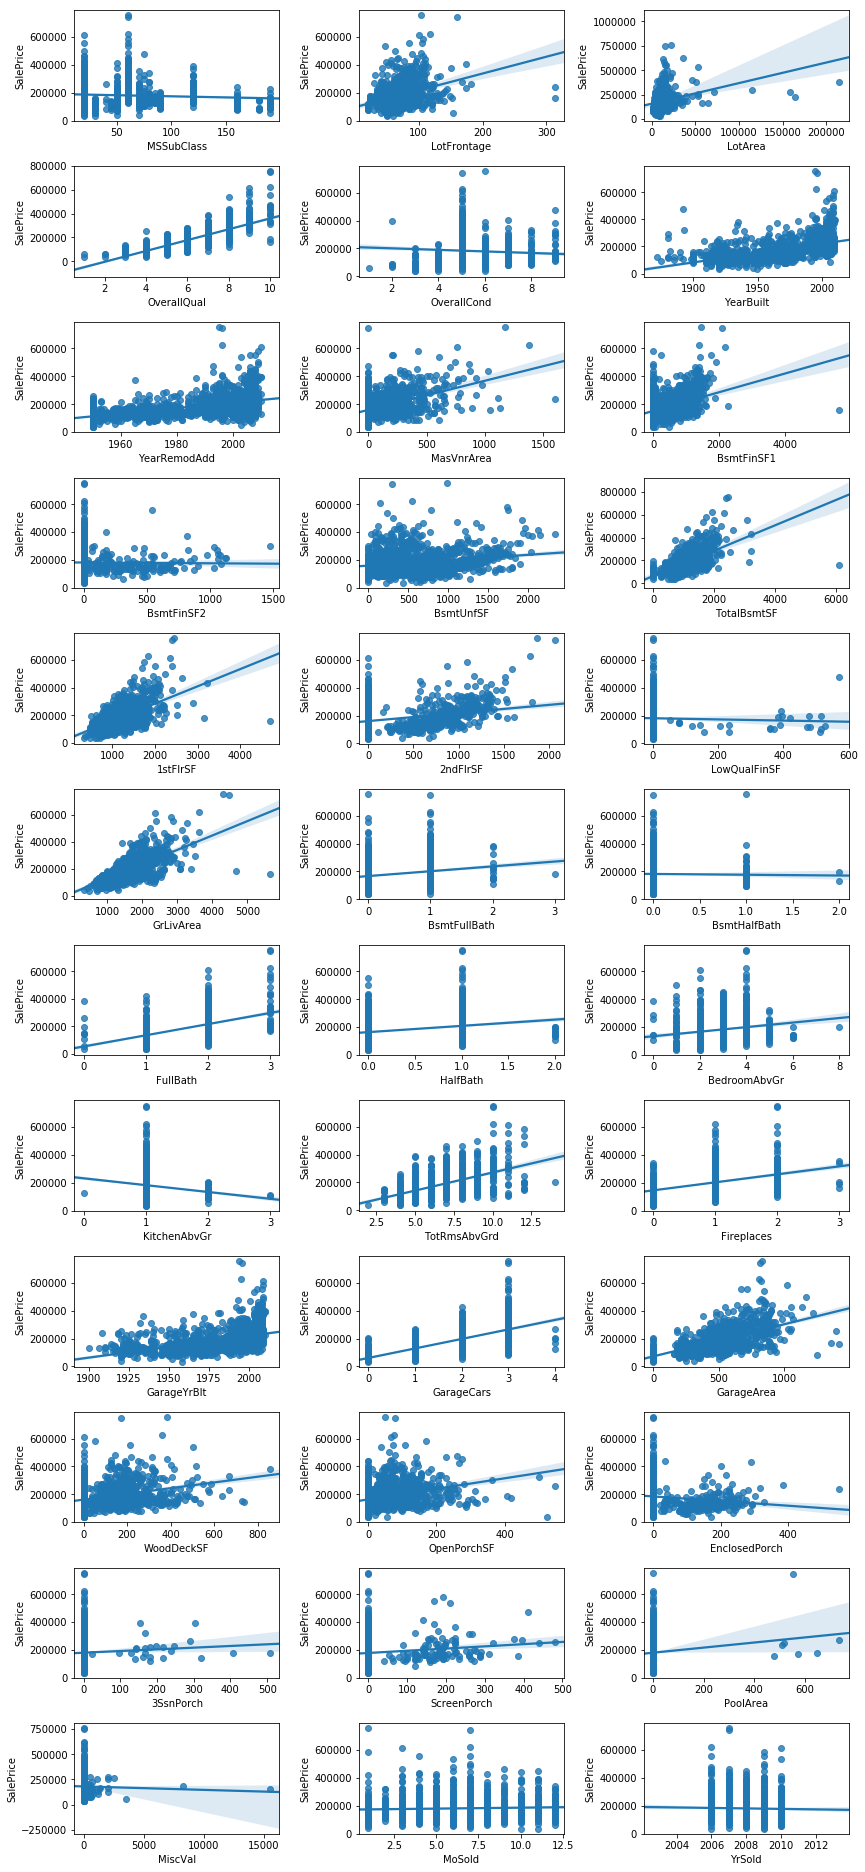

In [148]:
fig = plt.figure(figsize=(12,30))
for label_name in enumerate(check_shape.columns.values[0:36]):
    ax = fig.add_subplot(14,3,label_name[0]+1)
    sns.regplot(x=df[label_name[1]], y=df['SalePrice'])

plt.tight_layout()
plt.show()

面積系のやつに（なんとなくですが）確かに外れ値っぽいのがいる感じです。
右下の方に面積が大きいのに、安い家があります。

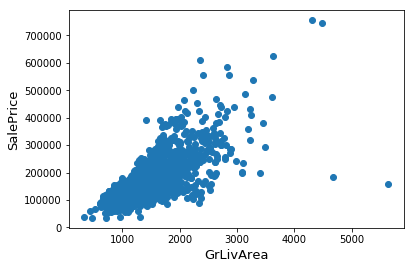

In [149]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

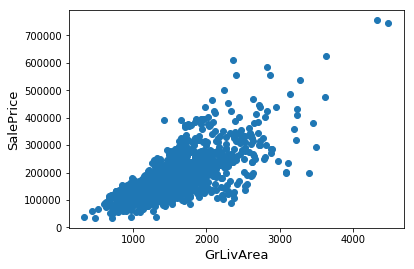

In [150]:
#Deleting outliers
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

(1458, 37)


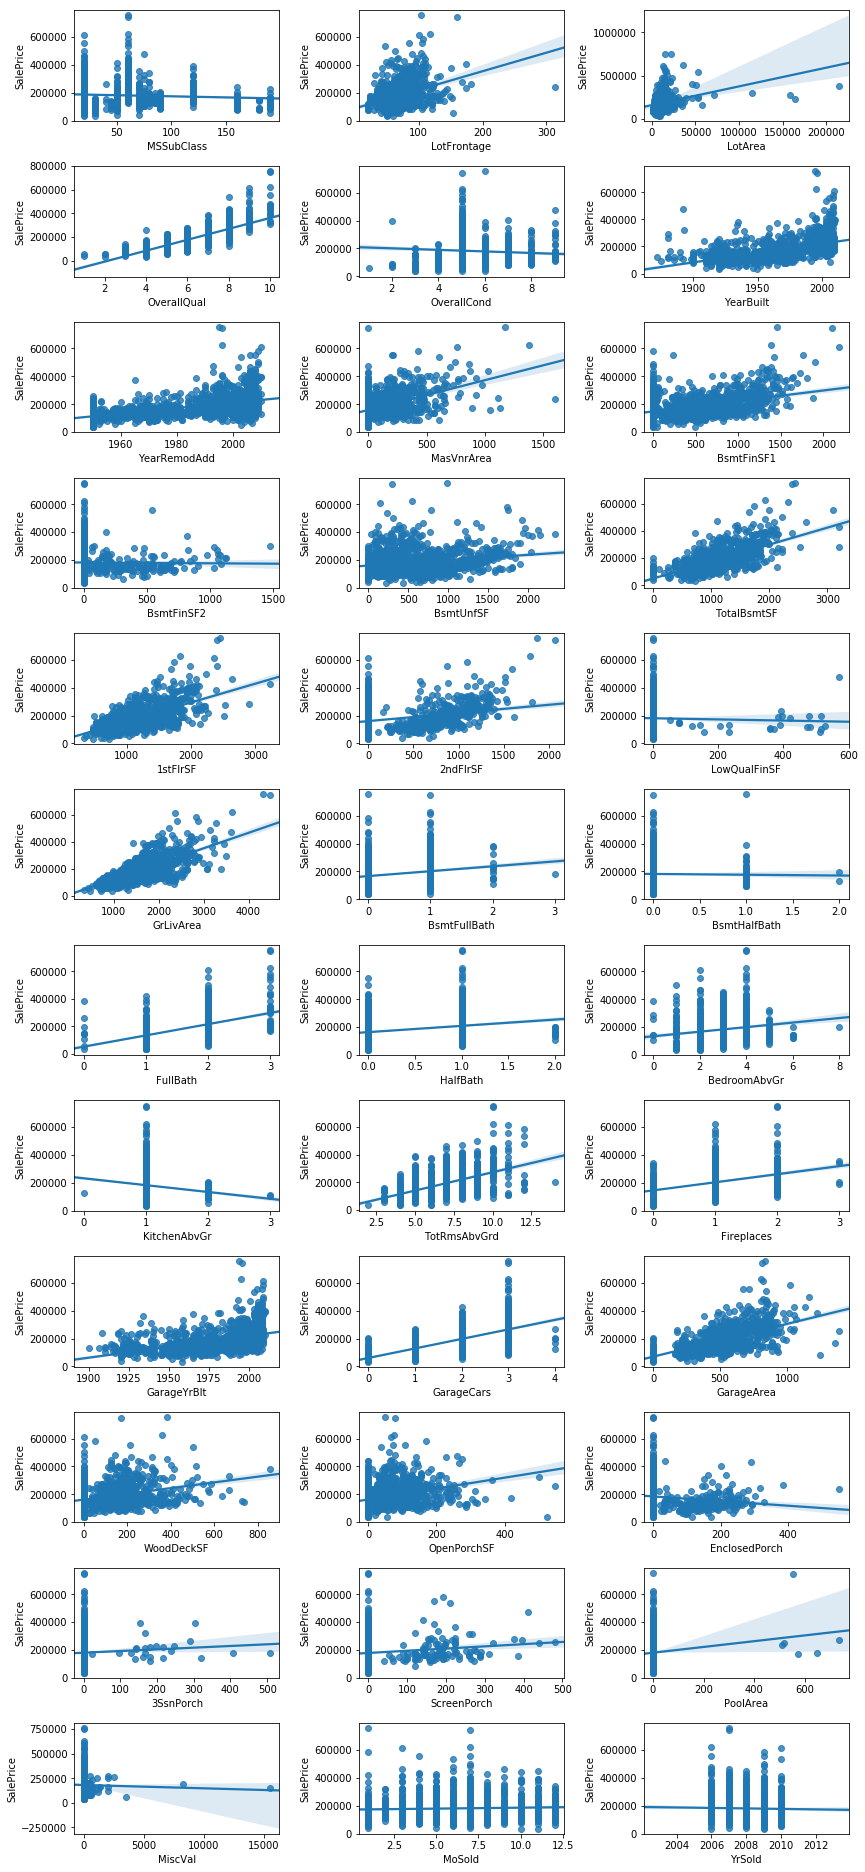

In [151]:
check_shape = df.select_dtypes(include=[int, float]) #dfから数字のやつだけ抜き出してくる
print (check_shape.shape)
fig = plt.figure(figsize=(12,30))
for label_name in enumerate(check_shape.columns.values[0:36]):
    ax = fig.add_subplot(14,3,label_name[0]+1)
    sns.regplot(x=df[label_name[1]], y=df['SalePrice'])

plt.tight_layout()
plt.show()

二点削除しただけで、面積関係の部分で複数の外れ値が消えていることがわかります

### 前処理3　外れ値の削除
回帰問題なので、答えの分布の形を一応見ておく。


 mu = 180932.92 and sigma = 79467.79



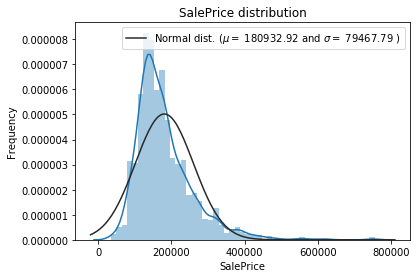

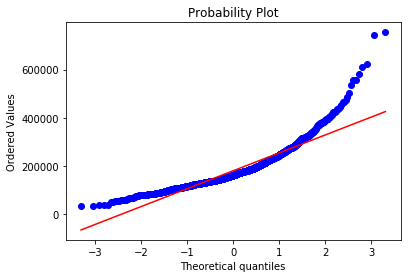

In [152]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

目標変数は右が右に偏っています。

（線形）モデルは、正規分布したデータを愛用するので、この変数を変換して正規分布になるようにします。


 mu = 12.02 and sigma = 0.40



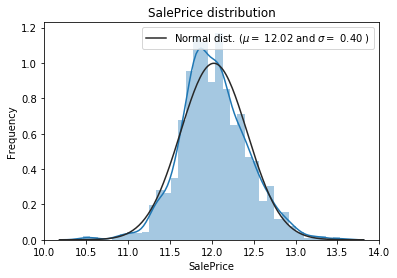

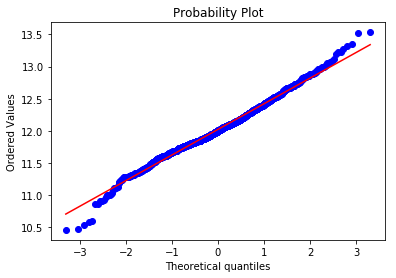

In [153]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["SalePrice"] = np.log1p(df["SalePrice"])

#Check the new distribution 
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()


### 前処理4　nanを削除する
データを解析できるようにしてゆきます。

まず、データの説明文の中身から、データの答え方がいろいろあることがわかっているので、欠損値の処理をやっていきます。

#### nanを処理する準備
次以降で眺めていくと、中央値などで欠損値を埋めているケースがあることがわかります。
トレーニングはトレーニングで、テストはテストでやってしまうとその時点で精度に問題が出そうなので、nanの処理は連結して一緒にやってしまいます。

In [219]:
test = pd.read_csv('./input/test.csv')
#Save the 'Id' column
test_ID = test['Id']

test = test.drop('Id',axis=1)
train = df

In [155]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data.head()

all_data size is : (2917, 79)


/home/mari/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


#### 欠損値一覧

In [156]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

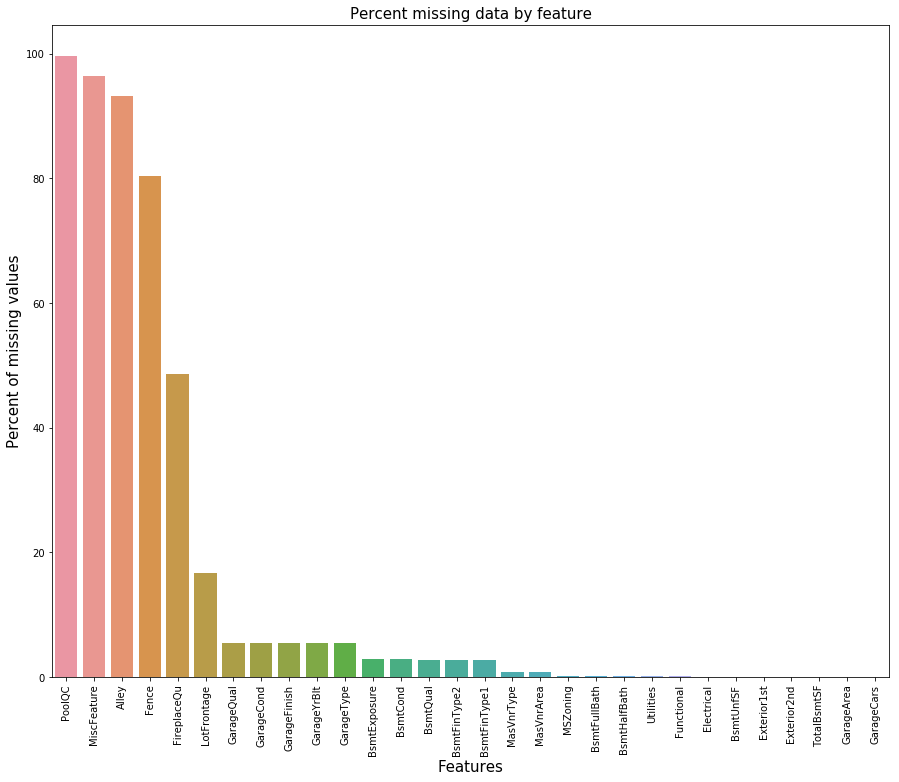

In [157]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

プールは持ってなかったらnanなので、かなりnanがいっぱいですね

こういうのをひとつひとつ手作業で解析できる形にしていきます

#### 相関をチェック

相関のある特徴量ばかりを持っていると精確に表現ができない場合などもあるため、相関をチェックします

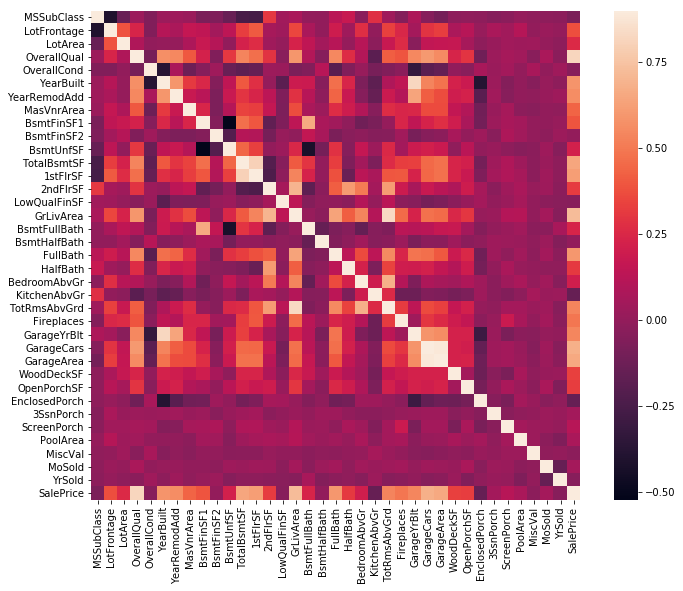

In [158]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

どこが白くなっているか見ておきます。
ガレージの築年数と家の築年数とかに相関があるのはそのとおりだなあという気持ち。

さていよいよ欠損値を処理していきます。Percent missing data by featureの上位項目から順に消していきます。

#### ①PoolQC: プールのクオリティ
NAは「プールなし」を意味します。 欠落値（+ 99％）は、一般的に普通の家はプールを持たないことを考えると、理にかなっています。 

In [159]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

#### ②MiscFeature : その他の機能

その他の機能がない場合、nanになっている

In [160]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

#### ③Alley : 接続している小道のタイぷ

路地がない場合、nanになっている

In [161]:
all_data["Alley"] = all_data["Alley"].fillna("None")

#### ④Fence : フェンスのクオリティ
フェンスがない場合、nanになっている

In [162]:
all_data["Fence"] = all_data["Fence"].fillna("None")

#### ⑤FireplaceQu : 暖炉のクオリティ
暖炉がない場合、nanになっている

In [163]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

#### ⑥GarageYrBlt、GarageArea、GarageCars : ガレージの年式　ガレージの面積　ガレージに何台入るか
ガレージに０台だったり、nanだったりするデータはそれ以外もセットでnanになっているため、ゼロで埋める

nanはそれぞれこんな感じ

In [164]:
print(all_data['GarageCars'].isnull().sum())
print(all_data['GarageArea'].isnull().sum())
print(all_data['GarageYrBlt'].isnull().sum())

1
1
159


GarageCarsがゼロのものは、駐車場がないのでnanになっていると考える。
そのためGarageAreamもGarageYrBltも０で埋める。

In [165]:
checkdf = all_data.groupby('GarageCars').get_group(0)
print(checkdf['GarageArea'].isnull().sum())
print(checkdf['GarageYrBlt'].isnull().sum())
checkdf.head()

0
157


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
39,1152,0,0,None,2,Duplex,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,N,Norm,Norm,FuseP,0,TA,TA,AsbShng,Plywood,None,None,0,PConc,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1152,0,GasA,TA,1Story,2,Fa,Lvl,Gtl,6040,Inside,65.0,Reg,0,90,RL,0.0,None,None,0,6,Edwards,0,5,4,N,0,None,CompShg,Gable,AdjLand,WD,0,Pave,6,0.0,AllPub,0,1955,1955,2008
48,736,716,0,None,2,2fmCon,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,736.0,Y,Norm,Norm,SBrkr,102,TA,TA,MetalSd,MetalSd,None,None,0,BrkTil,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1452,0,GasA,Gd,2Story,3,TA,Lvl,Gtl,4456,Inside,33.0,Reg,0,190,RM,0.0,None,None,0,6,OldTown,0,5,4,N,0,None,CompShg,Gable,Partial,New,0,Pave,8,736.0,AllPub,0,1920,2008,2009
78,1768,0,0,None,4,Duplex,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1768.0,N,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,None,None,0,CBlock,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1768,0,GasA,TA,1Story,2,TA,Lvl,Gtl,10778,Inside,72.0,Reg,0,90,RL,0.0,None,None,0,4,Sawyer,0,5,4,Y,0,None,CompShg,Hip,Normal,WD,0,Pave,8,1768.0,AllPub,0,1968,1968,2010
88,1013,0,0,None,2,1Fam,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1013.0,N,Feedr,Feedr,SBrkr,156,Fa,Fa,Plywood,Plywood,MnPrv,None,0,CBlock,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1526,0,GasA,TA,1.5Fin,1,Fa,Lvl,Gtl,8470,Corner,105.0,IR1,513,50,C (all),0.0,None,None,0,10,IDOTRR,0,2,3,N,0,None,CompShg,Hip,Abnorml,ConLD,0,Pave,6,1013.0,AllPub,0,1915,1982,2009
89,990,0,0,None,3,1Fam,TA,No,588.0,0.0,GLQ,Unf,1.0,0.0,Gd,402.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,None,None,0,PConc,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,990,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,8070,Inside,60.0,Reg,0,20,RL,0.0,None,None,0,8,CollgCr,0,5,4,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,5,990.0,AllPub,0,1994,1995,2007


carがnanの一件について、調べるとGarageAreaもGarageYrBltもnanであった

In [166]:
all_data['carflag'] = all_data['GarageCars'].isnull()
all_data['carflag'] = all_data['carflag'].replace('False', 0)
all_data['carflag'] = all_data['carflag'].replace('True', 1)
checkdf = all_data.groupby('carflag').get_group(1)
print(checkdf['GarageArea'].isnull().sum())
print(checkdf['GarageYrBlt'].isnull().sum())
checkdf.head()

1
1


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,carflag
2574,942,886,0,None,3,1Fam,TA,No,548.0,0.0,ALQ,Unf,0.0,0.0,Gd,311.0,Y,Norm,Norm,SBrkr,212,TA,TA,Wd Sdng,Plywood,MnPrv,None,0,BrkTil,2,Typ,NaN,NaN,NaN,NaN,NaN,Detchd,NaN,1828,0,GasA,Ex,2Story,1,Gd,Lvl,Gtl,9060,Inside,50.0,Reg,0,70,RM,0.0,None,None,0,3,IDOTRR,0,6,5,Y,0,None,CompShg,Gable,Alloca,WD,0,Pave,6,859.0,AllPub,174,1923,1999,2007,True


結局、これらのnanはすべて０で埋めることにした

In [167]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','GarageQual','GarageFinish','GarageCond','GarageType'):
    all_data[col] = all_data[col].fillna(0)
    
all_data = all_data.drop('carflag',axis=1)

#### ⑦BsmtFinSF1、BsmtFinSF2、BsmtUnfSF、TotalBsmtSF、BsmtFullBath、BsmtHalfBath：

欠損値は、地下室がないから、ゼロである可能性が高い。

In [168]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

#### ⑧BsmtQual、BsmtCond、BsmtExposure、BsmtFinType1、BsmtFinType2：
これらのカテゴリの全ての地下室関連の特徴量のNaNは、地下室がないことを意味します。：

In [169]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

#### ⑨MasVnrAreaとMasVnrType：
NA は、これらの家屋のための石工単板を意味しない可能性が最も高いです。 ここには0を、型にはNoneを指定できます。

In [170]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

#### ⑩MSZoning（一般的なゾーニングの分類）：

‘RL’は最頻値です。 そこで、欠損値を ‘RL’に置き換えることができます。

In [171]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

#### ⑪Utilities：

このカテゴリ機能の場合、「NoSeWa」と「NA」を除き、すべてのレコードは「AllPub」です。 「NoSewa」の家がトレーニングセットに含まれているので、この機能は予測モデリングに役立ちません。 

In [172]:
all_data = all_data.drop(['Utilities'], axis=1)

#### ⑫Functional ：
NAは典型的であることを示します。

In [173]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

#### ⑬Electrical ：
NAが1つあります。 この特徴はの最頻値は’SBrkr’なので、欠損値を最頻値に置き換えましょう。

In [174]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

#### ⑭KitchenQual：
KitchenQualの欠損値のために、1つのNA値とElectricalと同じだけ、私たちは ‘TA’（最頻値）に置き換えます。

In [175]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

#### ⑮Exterior1stとExterior2nd：
再びExterior 1と2の両方に欠損値が1つしかありません。 私たちは、最頻値に置き換えます。

In [176]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

#### ⑯SaleType：
最頻値で欠損値を置き換えましょう。

In [177]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

#### ⑰MSSubClass：
NAは建物クラスなしを意味します。 欠損値をNoneに置き換えることができます。

In [178]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

#### ⑱LotFrontage: 間口の広さ -259個
間口の広さは近所の家と同じ可能性が高いと推測→欠損値は近隣（同じ"Neighborhood"タグの中から選ぶ）のLotFrontageの中央値で埋めることができます。

In [179]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

欠損値を確認します

In [180]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


### 前処理5　型のエンコーディング

In [183]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

### 前処理６　ラベルのエンコーディング

In [184]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


### 前処理７　特徴量追加
面積関連の特徴は住宅価格を決定するために非常に重要であるため、各住宅の地下1階と2階の合計面積を追加する

In [187]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### 前処理８　Skewed features


In [188]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


#### Box Cox Skewed featuresの変換

In [189]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])


There are 59 skewed numerical features to Box Cox transform


In [190]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [191]:
train = all_data[:ntrain]
test = all_data[ntrain:]

## クロスバリデーション

Sklearnのcross_val_score関数を使用します。クロスバリデーションの前にデータセットをシャッフルするために、1行のコードを追加します。

In [195]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## モデリング

In [194]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [197]:
#LASSO Regression 
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0073)



In [198]:
#Elastic Net Regression 
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1115 (0.0073)



In [199]:
#Kernel Ridge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1151 (0.0074)



In [200]:
#Gradient Boosting Regression 
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
max_depth=4, max_features='sqrt',
min_samples_leaf=15, min_samples_split=10, 
loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1169 (0.0087)



In [201]:
#XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
learning_rate=0.05, max_depth=3, 
min_child_weight=1.7817, n_estimators=2200,
reg_alpha=0.4640, reg_lambda=0.8571,
subsample=0.5213, silent=1,
random_state =7, nthread = -1)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1167 (0.0060)



In [202]:
#LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
learning_rate=0.05, n_estimators=720,
max_bin = 55, bagging_fraction = 0.8,
bagging_freq = 5, feature_fraction = 0.2319,
feature_fraction_seed=9, bagging_seed=9,
min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1152 (0.0077)



## Stacking models
最も単純なstackのアプローチとして基本モデルの平均化があります。
ベースモデルを平均化するこの単純なアプローチから始めます。 、

### 平均化されたベースモデルクラス

In [204]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

### 平均ベースモデルスコア
ENet、GBoost、KRR、そしてlassoの4つのモデルをここで平均します。 もちろん、もっと多くのモデルを簡単に追加することができます。

In [205]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1088 (0.0076)



## メタモデルの追加

トレーニング部分の手順は、次のように記述できます。

トータルトレーニングセットを2つの互いに素なセットに分割します（ここではtrainと holdout ）
最初の部分（train）にいくつかのベースモデルを学習する
これらのベースモデルを2番目の部分（ホールドアウト）でテストします。
3）からの予測を入力として使用し、メタモデルと呼ばれるより高いレベルの学習モデルを学習するための出力としての正しい応答（目標変数）を使用します。
最初の3つのステップは繰り返し実行されます。例えば、5つのスタッキングを取る場合、最初にトレーニングデータを5つに分割します。データを5個に分割した上で、そのうちの1つをテストデータとし、残る4個を学習用のデータとするアプローチです。

　予測部分では、テストデータ上のすべてのベースモデルの予測を平均し、それらをメタモデルとして使用して、最終的な予測をメタモデルで行います。


### Stacking averaged Models Class


In [207]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

同じ数のモデルを使用して2つのアプローチを比較可能にするために、我々はEnet KRRとGboostの平均値を取った後、lassoをメタモデルとして追加します。

In [208]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))


Stacking Averaged models score: 0.1081 (0.0074)


### Ensembling StackedRegressor, XGBoost and LightGBM
前に定義した StackedRegressor に XGBoost と LightGBM を追加します。

In [210]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### Final Training and Prediction

In [211]:
# StackedRegressor
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07847594840413466


In [212]:
# XGboost
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.07849121858290378


In [213]:
#LightGBM
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07311768814571257


In [214]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.0756751885956498


## Ensemble prediction

In [216]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

## Submission

In [220]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

このCSVを提出して終わりです。
お疲れ様でした